# Time Series Data Visualization
---
In this Notebook we are going to learn about different data visualization techniques for time series analysis. we will also discuss the different tasks we can consider for a better understanding, exploration and anlysis, while working with time series datasets.

The dataset: Average daily temprature of different cities around globe from 1995 to 2020

Source: https://www.kaggle.com/datasets/subhamjain/temperature-of-all-countries-19952020


## Agenda:
    Task1: Importing our dataset 
    Task2: Data Preprocessing
    Task3: Analysing global temperature from 1995 to 2019
    Task4: Comparing yearly average temperature of different regions over time
    Task5: Monthly average temperature in Canada

----

## Task 1: Importing modules

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

print("Modules imported successfully!")

Modules imported successfully!


#### Let's load our dataset

When I load the dataset, I get a warning message below:
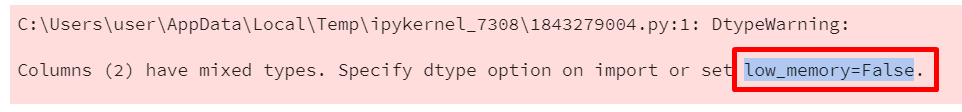

So what I did is copy the message "*low_memory=False*" and add it in my read command.

In [2]:
data = pd.read_csv('dataset.csv', low_memory=False)
data.head()

Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9

In [3]:
# Let's check the tail too
data.tail()

Region Country                   State                  City  \
2906322  North America      US  Additional Territories  San Juan Puerto Rico   
2906323  North America      US  Additional Territories  San Juan Puerto Rico   
2906324  North America      US  Additional Territories  San Juan Puerto Rico   
2906325  North America      US  Additional Territories  San Juan Puerto Rico   
2906326  North America      US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  AvgTemperature  
2906322      7   27  2013            82.4  
2906323      7   28  2013            81.6  
2906324      7   29  2013            84.2  
2906325      7   30  2013            83.8  
2906326      7   31  2013            83.6

So in our data frame we have different columns region, country, state and city, month, day year and average temperature. The average temperature of each day from 1995 to 2020.

The Dataset That we are going to work with is a ***Geo-Spatial Time-Series Dataset***

#### What is our dataset representing? 
**Geo-Spatial**: Data represents that **Something** has happend **somewhere**! <br>
**Time-Series**: Data represents that **Something** has happend **at a specific time**! <br>
<br>
**Geo-Spatial Time-Series Dataset**: Data represents that **Something** has happend **somewhere** **at a specific time**!

So something (average temperature) has happened somewhere (Region, Country, State, City)
at a specific time (Month, Day, Year). That's why our dataset is a __Geo-Spatial Time-Series Dataset__. During this project we are only focused on the time series properties of this dataset
because we're talking about time series data analysis.

While working with time series data when we want to analyze them, there are three important tasks that we should always keep in our mind.

### Time Series tasks:
__1. Overall Trend analysis:__
The first one is overall trend analysis where we want to see over the period of the time that we visualized our data. Is there any trend like is it any positive trend or negative trend is the data points are decreasing or increasing over the time in our time period.

__2. Key Moments:__
The second task is finding key moments. We want to find the data points with the maximum or minimum values. So based upon our analysis sometimes we care about these key moments. So that's why we have to look for the best visualization technique to show the key moments.

__3. Outliers:__
The third task is outlier detection. We want to see the outliers in our data in order to find them and remove them.
So what are the best visualization techniques for finding outliers. 

So during this project we're going to see what are the best visualizations in order to solve all of these tasks.

## Task 2: Preprocessing

#### Let's get only our needed columns

In [4]:
needed_columns = ["Region","Country","City","Month","Day","Year","AvgTemperature"]
data = data[needed_columns]
data.head()

Region  Country     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria  Algiers      1    1  1995            64.2
1  Africa  Algeria  Algiers      1    2  1995            49.4
2  Africa  Algeria  Algiers      1    3  1995            48.8
3  Africa  Algeria  Algiers      1    4  1995            46.4
4  Africa  Algeria  Algiers      1    5  1995            47.9

Let's convert fahrenheit to celsius

In [5]:
# all the values in our AvgTemperature column are in fahrenheit
# our formula for this is "temp - 32 * 5/9"
# round the value
# store it in the same AvgTemperature column
fahrenheit = round((data["AvgTemperature"] - 32) * 5/9, 1)

In [6]:
data["AvgTemperature"] = fahrenheit

In [7]:
# Now our AvgTemperature are in celcius.
# Let's check the head of the data again
data.head()

Region  Country     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria  Algiers      1    1  1995            17.9
1  Africa  Algeria  Algiers      1    2  1995             9.7
2  Africa  Algeria  Algiers      1    3  1995             9.3
3  Africa  Algeria  Algiers      1    4  1995             8.0
4  Africa  Algeria  Algiers      1    5  1995             8.8

#### Let's find the outliers
One of the best visualization techniques to find outliers
in a column of the data frame is to draw the histogram
of that column.

<AxesSubplot:>

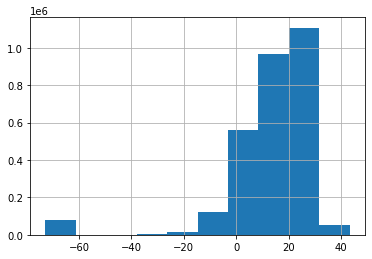

In [8]:
data["AvgTemperature"].hist()

The histogram that we generated basically represents the distribution
of the data for AvgTemp column.
The data here is a column pandas series, a list of float
values. In this histogram in the x axis we have
different values and in the y axis we have the probability
of each specific value happening in our data.

In here we can see that most of our data, the temperatures
that we have, is more than -40 degrees.
But if we look at the left side of the plot we can see
that we have some values less than -60.
It means that we have some records related to one day,
where the average temperature was -60, which
doesn't make sense.
So that's why this is considered as an outlier.

#### Removing the outliers 

We are only grabbing this side of the histogram.

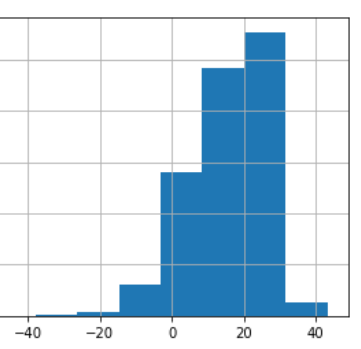

<AxesSubplot:>

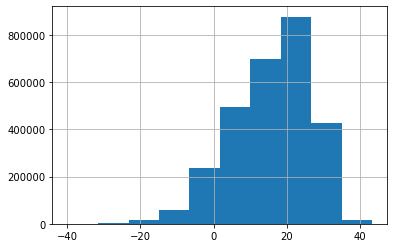

In [9]:
# exclude the -60%
data = data[data.AvgTemperature > -40]

# let's check the histogram again
data["AvgTemperature"].hist()

Now there is no outlier in the values.
The next thing that we're going to do is that we want to see the time range of our data.

#### Sorting values by Year, Month and Day Column to see the time range of our data

In [10]:
data.sort_values(["Year", "Month", "Day"])

Region                   Country         City  Month  Day  \
0               Africa                   Algeria      Algiers      1    1   
13809           Africa                     Benin      Cotonou      1    1   
23075           Africa  Central African Republic       Bangui      1    1   
32341           Africa                     Congo  Brazzaville      1    1   
41606           Africa                     Egypt        Cairo      1    1   
...                ...                       ...          ...    ...  ...   
2862479  North America                        US    Green Bay      5   13   
2871744  North America                        US      Madison      5   13   
2881009  North America                        US    Milwaukee      5   13   
2890274  North America                        US       Casper      5   13   
2899539  North America                        US     Cheyenne      5   13   

         Year  AvgTemperature  
0        1995            17.9  
13809    1995            27.3  
23075    1995            24.1  
32341    1995            26.6  
41606    1995            15.1  
...       ...             ...  
2862479  2020             3.6  
2871744  2020             7.6  
2881009  2020             5.1  
2890274  2020            12.3  
2899539  2020             9.2  

[2826605 rows x 7 columns]

Since the data related to the year 2020 is not complete in this dataset, the next thing that we're going to do is to remove the data related to 2020 from the dataset.

In [11]:
# another way to drop the data is by using math symbol
data = data[data.Year < 2020]

# let's sort the dataset again
data.sort_values(["Year", "Month", "Day"])

Region                   Country         City  Month  Day  \
0               Africa                   Algeria      Algiers      1    1   
13809           Africa                     Benin      Cotonou      1    1   
23075           Africa  Central African Republic       Bangui      1    1   
32341           Africa                     Congo  Brazzaville      1    1   
41606           Africa                     Egypt        Cairo      1    1   
...                ...                       ...          ...    ...  ...   
2862345  North America                        US    Green Bay     12   31   
2871610  North America                        US      Madison     12   31   
2880875  North America                        US    Milwaukee     12   31   
2890140  North America                        US       Casper     12   31   
2899405  North America                        US     Cheyenne     12   31   

         Year  AvgTemperature  
0        1995            17.9  
13809    1995            27.3  
23075    1995            24.1  
32341    1995            26.6  
41606    1995            15.1  
...       ...             ...  
2862345  2019            -2.4  
2871610  2019            -3.7  
2880875  2019            -2.2  
2890140  2019            -7.6  
2899405  2019            -4.2  

[2787863 rows x 7 columns]

Now the data that we'll be working on for this project is a pre-pandemic (covid) period.

## Task 3: Global temperature from 1995 to 2019 
    - Aggregating our data based on the year 
    - plot our data in a line chart 

In this task we are going to analyze global temperature
from 1995 to 2019. Before this we need to prepare our data that we need
for this analysis. What we need to do here is that we need to calculate
the average temperature per year. In order to do this, we can aggregate our data based upon the year.

In [12]:
# get Year and AvgTemp column
data[["Year", "AvgTemperature"]]

Year  AvgTemperature
0        1995            17.9
1        1995             9.7
2        1995             9.3
3        1995             8.0
4        1995             8.8
...       ...             ...
2906322  2013            28.0
2906323  2013            27.6
2906324  2013            29.0
2906325  2013            28.8
2906326  2013            28.7

[2787863 rows x 2 columns]

In our result above, we are going to aggregate the __Year__ column and calculate the mean of the __AvgTemp__ column.

In [13]:
# use groupby to groupby Year
# then calculate the mean
# put reset index at the end so that we don't have a multi index uh data frame at the end.
# then store it in a new variable
data_agg = data[["Year", "AvgTemperature"]].groupby("Year").mean().reset_index()

# let's check the head
data_agg.head()

Year  AvgTemperature
0  1995       15.234645
1  1996       14.819832
2  1997       15.076760
3  1998       16.040177
4  1999       15.741267

Now let's draw a line chart to see how these values change during the time.

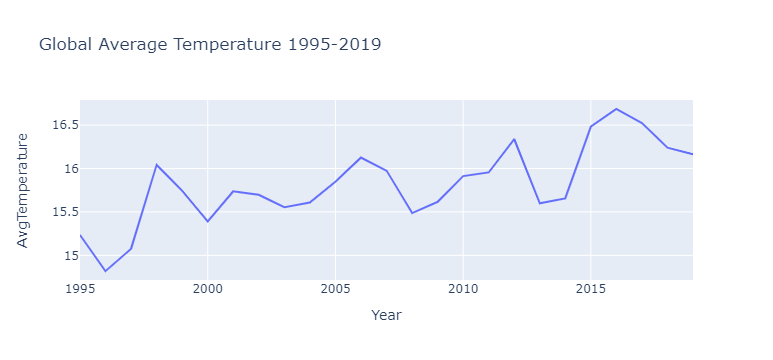

In [14]:
# use plotly express
# first argument is our data
# second argument is x axis
# third argument is y axis
# fourth argument is title of the plot
px.line(data_agg, x = "Year", y = "AvgTemperature", title = "Global Average Temperature 1995-2019")

So in the X axis we have different years and in the y axis
we have average temperature in each year.

The next thing that we're going to do is add all of the ticks to the X axis so that we can see all of the years to do this.

I will go to the next line
fig, I will put it into a variable called thick and I
would say fig dot update X axis.
There is a parameter called ... and I will put it
as the year column and at the end I will say fig dot show
okay, now if I run this again here you can see we can see all
of the years uh in the X axis.

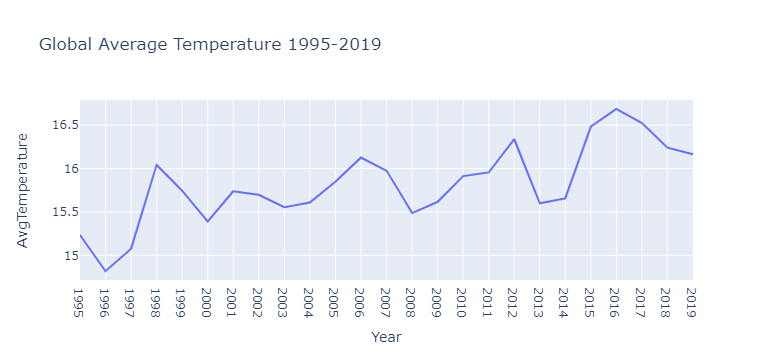

In [15]:
# store the code above in fig variable
fig = px.line(data_agg, x = "Year", y = "AvgTemperature", title = "Global Average Temperature 1995-2019")
# reflect the tick labels per year in x-axis
fig.update_xaxes(dtick = 'Year')
fig.show()

Okay, now let's see which tasks we can solve using the line chart that we generated above.

### Time Series tasks:
__1. Overall Trend analysis__
So, as we can see by looking at this chart, we can easily
say that in overall trend, the growth of average temperature
in the specific time period that we have from 1995 to 2019 has been growing over the time.

So, line charts are one of the best visualization techniques that we can use for showing the overall trend.

__2. Key Moments__
So the question is, "Using a line chart, can we see the data
points with the maximum and the minimum value?".
Of course! By looking at this line chart, we can say that
in 2016 we have the maximum yearly average temperature.
And if we look at the 1996 we can see that we had
the minimum yearly average temperature.

So we can say that line charts are also good for detecting
key moments in our data.

__3. Outliers__
If we take a look at this line chart, we cannot see any outliers in our data.
But suppose let's say in 2001, instead of having average yearly average temperature of 15.7,
we had average temperature of over 16. The data point would spike up here and then our line
would have looked like from 1996 jumping high up on 2001. And we
could have easily seeing the outlier in our data using the line
chart. 

So line charts is also good for outlier detection.

The next thing that we're going to talk about is a technique
that we can use for overall trend analysis in our chart.

### Overall Trend Analysis
Let's fit a linear line to our plot using numpy and Linear Regression 

In [16]:
# this means we will be drawing a line in our figure above.
# use polyfit from numpy.
# feed Year to our X axis.
# AvgTemp to our Y axis.
# specify 1 as degree of our polynomial.
np.polyfit(x = data_agg.Year, y = data_agg.AvgTemperature, deg = 1)

array([ 4.51008956e-02, -7.46970494e+01])

After running the block above, we can see that we have two values
here. The first value (4.51008956e-02) is the gradient or slope of our line.
And the second one (-7.46970494e+01) is basically the value where
the line cuts the Y axis.

Note the formula of a line below:

__y = mx + c__

where:
__m__ is the gradient of the line and __c__ is the intercept of the line.

Therefore, in the result of our code above:
__4.51008956e-02__ is the value of __m__ and __-7.46970494e+01__ is the value of the __c__.

Let's store our code above to a variable.

In [17]:
coefs = np.polyfit(x = data_agg.Year, y = data_agg.AvgTemperature, deg = 1)

# Formula of a line:
# y = mx + c

# Create a variable 'm' where it is assigned to the first element of 'coefs'
m = coefs[0]
# And 'c' as the second eleemnt of 'coefs'
c = coefs[1]

# now let's create our line
line = m * data_agg.Year + c
# note that in our formula 'mx + c', x is our Year column.

# let's check what we have in our line
line

0     15.279237
1     15.324338
2     15.369439
3     15.414540
4     15.459641
5     15.504742
6     15.549843
7     15.594944
8     15.640044
9     15.685145
10    15.730246
11    15.775347
12    15.820448
13    15.865549
14    15.910650
15    15.955751
16    16.000852
17    16.045953
18    16.091053
19    16.136154
20    16.181255
21    16.226356
22    16.271457
23    16.316558
24    16.361659
Name: Year, dtype: float64

Now if we take a look at the __line__, we can see that we have an array with 25 different float values. Now let's draw this line in our figure above.

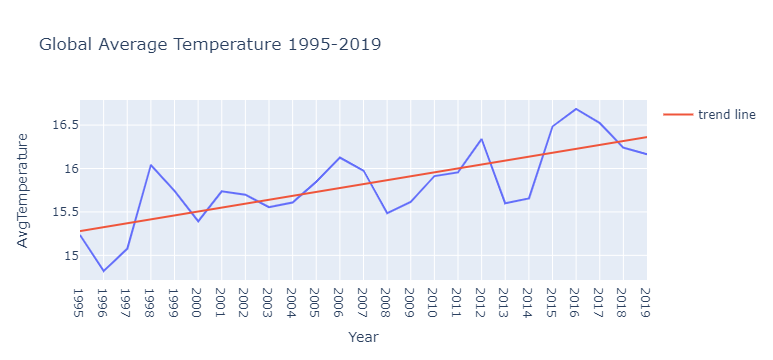

In [18]:
# use 'add_trace', a method where we can add different traces to our plot.
# use 'go', a graphical object in plotly.
# use Scatter and pass in our X which is 'Year' in our data and pass in Y which is 
# the predicted line we have feeded in our data.
# put a name in our line.

fig.add_trace(go.Scatter(x = data_agg.Year, y = line, name = "trend line"))
fig.show()

As we can see, we have a line fitted to our data points.
This trend line shows a positive trend in our data points. It means that over the time period of our data, we can see that our data points have been increasing.

So using our visualization, we could say that from 1995 to 2019, the global average temperature
has been increasing which is showing the global warming.

Now the next thing that we're going to do is to visualize the same data, the yearly average temperature from 1995 to 2019, but this time using a bar chart.

### Bar chart vs Line chart
Let's compare Bar chart and Line chart in terms of the tasks we can solve using each of them

Time Series tasks:

    1- Overall trend analysis
    2- Key Moments
    3- Outliers

Let's plot a bar chart for the same data

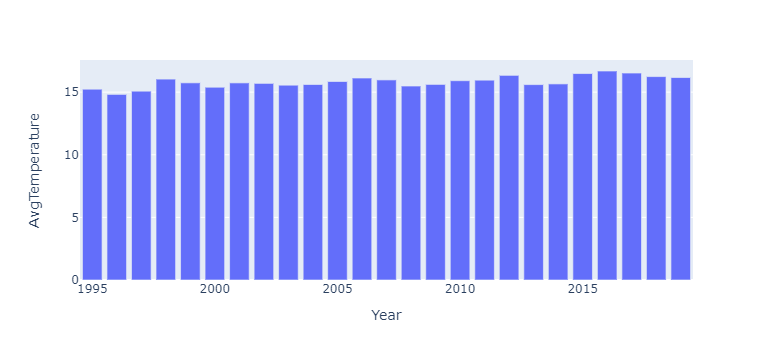

In [19]:
# use plotly express bar
# first argument is the dataframe of our data
# the x parameter is the name of our X axis
# the Y is the name of our y axis
px.bar(data_agg, x = "Year", y = 'AvgTemperature')

After running the code above, we can see a bar chart showing the exact
same data. In the X axis we have different years and in the Y axis we have different
temperatures.

Now let's talk about different tasks that we can solve using
this bar chart. 

Let's start with overall trend
analysis. As we can see, it is so difficult to see
the positive trend in our data.
But if we want to compare it to the line chart we generated above, we can
easily see how fast the data points are increasing over time.
But it's not easy to see it in this bar chart.
So, bar charts are not always good for seeing overall trends.

The next task is key moments detection. 
Can we easily find the data point with the maximum value and the data point with the minimum value? Using a line chart, again, it's easier to find the minimum value and the maximum
value in the chart.

The next task is outlier detection.
We don't have an outlier in our data right now, but if we had
an outlier using the length of the bar which represents
the average temperature, we could easily find the outlier
in our data.

Now let's do some changes in our bar chart. 
As we know, each of the bars that we have can have
different colors based upon different variables in our data.
For example, we can map different years to the color of each
each of the bars that they have.

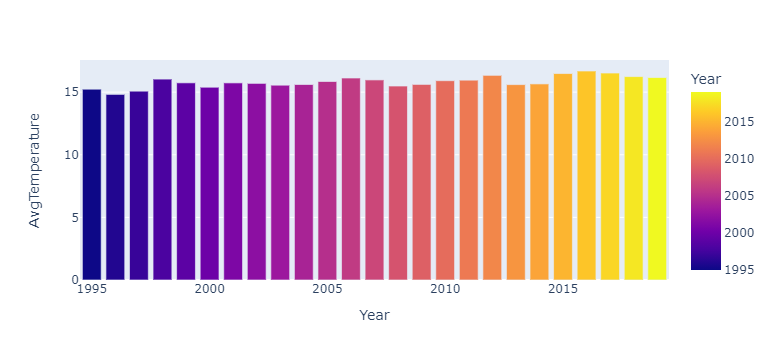

In [20]:
px.bar(data_agg, x = "Year", y = 'AvgTemperature', color = 'Year')

As we can see here from 1995 to 2019, we have different
colors specified for different years.
However, as we can see this mapping, the color mapping in our
chart, is not actually helping us for the different tasks
that we have.

But what if, instead of year we map the color into average
temperature column.

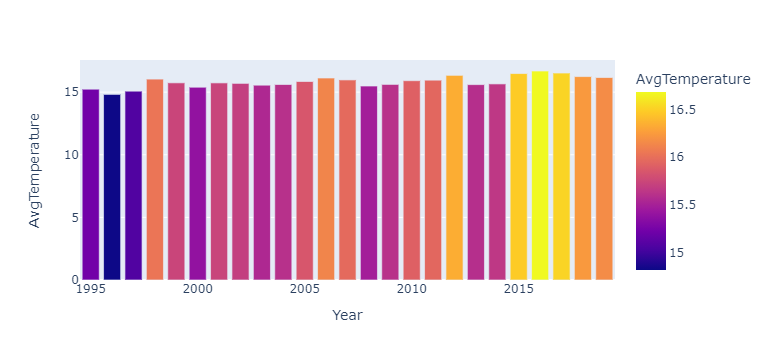

In [21]:
px.bar(data_agg, x = "Year", y = 'AvgTemperature', color = 'AvgTemperature')

Now we can see that different average temperature values is mapped to different colors using
this technique. We can easily find maximum and minimum values in our data.
Based upon these colors, the blue color is showing the lowest average temperature.

If we look at our data, We can see that the lowest average temperature is 1996.
And if we look at the yellow, which is representing the highest average temperature, we can see that in 2016 we had the maximum yearly average temperature.

So color mapping is a very perfect technique for enhancing our plots and charts for a better understanding, a better visualization.

### Task 4: Let's compare yearly average temperature of different regions over time 

In [22]:
# Lets check unique value our rgion
data.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [23]:
# let's get only the needed column and use groupby on region and year.
# store it in a variable.
# call reset underline index in order not to get and multi index data frame.

data_regions = data[["Region", "Year", "AvgTemperature"]].groupby(["Region", "Year"]).mean().reset_index()

# Check the head
data_regions.head()

Region  Year  AvgTemperature
0  Africa  1995       23.272222
1  Africa  1996       23.085704
2  Africa  1997       23.023177
3  Africa  1998       23.193769
4  Africa  1999       23.274374

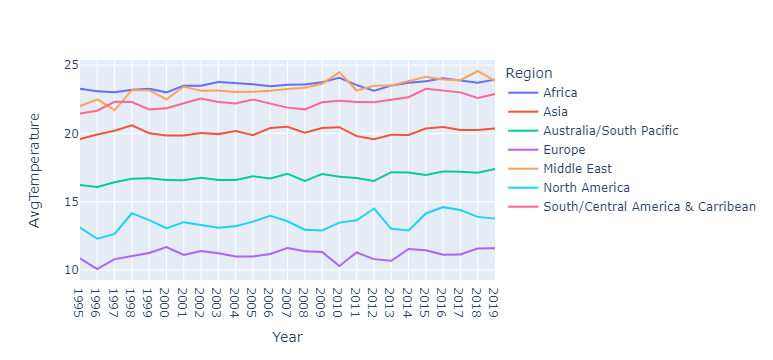

In [24]:
# after preparing our data, let's draw a line chart.
# since we have different regions in our data, we need a line for each region in our linechart.
# thus, use the color argument to map the color of the linechart into the different region that we have.
# store in a fig1 variable
fig1 = px.line(data_regions, x = "Year", y = "AvgTemperature", color = "Region")
# use update_xaxes dtick to see all of the years in the x axis.
fig1.update_xaxes(dtick = "Year")
fig1.show()

As we can see, we have a line chart containing of different lines showing
the yearly average temperature of different regions from 1995 to 2019.

Let's see what are the insights that we can get from this visualization.
First, we can see that the coldest region of the whole
world, which always has been the coldest one from
1995 to 2019 years, is the Europe.
And the second one is North America; and then Austria; and then Asia; and then South Central America; and Caribbean; and then going to Middle East.
And the hottest region we have is the Africa.

If we want to talk about the different tasks that we
can solve using this visualization, we're going to start
with overall trend analysis for each of the line chart that we can see.

One of the coolest features of plotly is that we can see
each of these lines individually.

For example, let's say we're gonna see only the Middle
East. If we double click on its line, we can filter it
out while all of the other lines are turned off.

If we double click on Middle East line, we will see that we have a very huge positive
trend during our time period.
And if we want to compare it, let's say to Africa, we can double click its line as well and we
will see that most of the time, Africa, until 2009, has been the warmest region in the whole world. And after 2009, in 2010, Middle East had higher average yearly
average temperature than Africa.
And then one year later again Middle East fluctuated
and decreased the yearly average temperature
in 2011.

So this is great that we can actually work
with different features of plotly in order to analyze
overall trends and key moments and compare different lines
that we have in our line chart.

Now let's say we want to answer this question: 

__Which region had the highest yearly average temperature over our time
period?__

In order to answer this question, we need to zoom
in to this part to find the key moments that we are looking
for.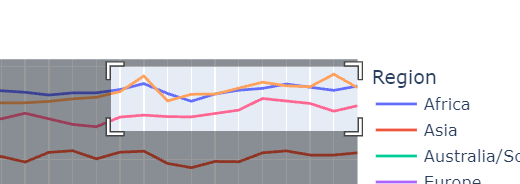

By doing that, we will see that the hottest region was Middle East in 2018 with the yearly
average temperature of 24.5.

Note: Double click anywhere in the chart to return to the original chart.

### Task 5: Monthly average temperature in Canada

In [27]:
# get only the needed data for Canada
# first filter only the Country column for Canada then get the needed columns
# store it in a variable
data_canada = data[data.Country == "Canada"][["Month", "Year", "AvgTemperature"]]

# group by based upon month and year and calculate an average of the average
# temperature for each month.
# store it again in data_canada
# use reset_index to reset indexing
data_canada = data_canada.groupby(["Month", "Year"]).mean().reset_index()

# check head of the variable
data_canada

Month  Year  AvgTemperature
0        1  1995       -7.017419
1        1  1996      -12.089677
2        1  1997      -10.982581
3        1  1998       -8.588065
4        1  1999       -8.954000
..     ...   ...             ...
295     12  2015       -4.191667
296     12  2016      -10.295161
297     12  2017      -10.885484
298     12  2018       -8.438710
299     12  2019       -8.301613

[300 rows x 3 columns]

Creating a date column with this format ***MONTH/YEAR***

In [29]:
# first we need to convert Month column and year column to string type
data_canada.Month = data_canada.Month.astype(str)
data_canada.Year = data_canada.Year.astype(str)

# now create the panda series with the data that we want
# store it in a new column in our data frame
data_canada["Date"] = data_canada.Month + "/" + data_canada.Year

# let's take a look at our dataframe again
data_canada.head()

Month  Year  AvgTemperature    Date
0     1  1995       -7.017419  1/1995
1     1  1996      -12.089677  1/1996
2     1  1997      -10.982581  1/1997
3     1  1998       -8.588065  1/1998
4     1  1999       -8.954000  1/1999

As we can see we have a new column with the date format. Now that we have prepared our data,
let's plot a bar chart to analyze this data.

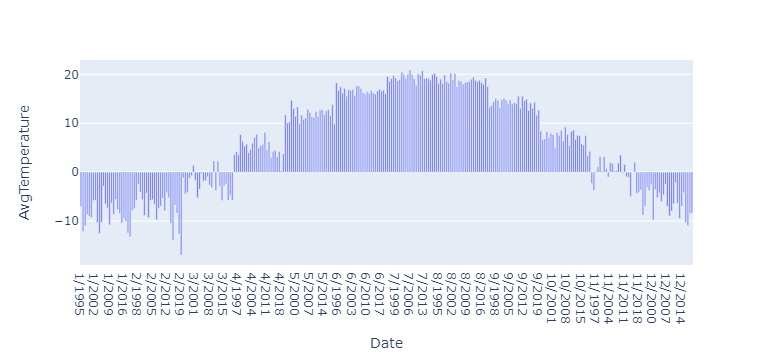

In [30]:
fig = px.bar(data_canada, x = "Date", y = "AvgTemperature")
fig.show()

We can see the bar chart related to different months in different years from 1995 to 2019.
If we zoom in to the left most part of the graph, we can see
that January 1995, January 1996, 1997, 1998 and so on and so forth.
So basically, as we can see in the X axis, we have all
of the first month for different years grouped together.
And then again, from the middle to the right part of the chart we have second month
related to different years grouped together.

If we go back to the original graph, we can see
that at the first of the years like in January and February,
we have a very very low temperature. And when it comes
to this part of the graph,

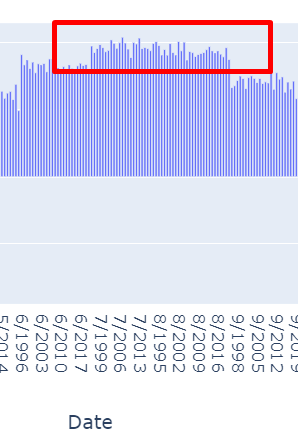

we can see that in some months the weather is so hot in Canada.
But the point is distinguishing between different months is so hard
in this graph.

So what is the solution here?

The best way to do this is by coloring our bar charts based
upon different months that we have so easily.

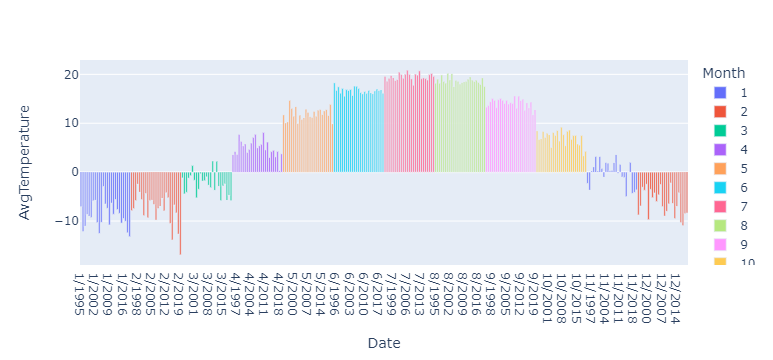

In [31]:
fig = px.bar(data_canada, x = "Date", y = "AvgTemperature", color = "Month")
fig.show()

Now we can see we have different colours mapped into different months that we have.
In this way we can distinguish between different months and we can see the key moments, way more better in this graph.

Now, if someone asks, "What is the hottest months usually
In Canada?". We can easily look at our graph
and say "according to my data from 1995 to 2019, July is
always the hottest month."

Or if somebody asks us "What is the coldest month?". We can
easily say "my data shows that January is
the coldest month of the year."

So using this bar chart, we could easily answer to key
moments related questions.

But how about the outlier detection?

As we know, for example, let's look at the purple bars showing only
the month April from 1995 to 2019. Is it possible to see the outliers easily in this data?

Of course! If we zoom in, we can easily find the outliers in april.
But if we zoom out, finding outliers is not that easy.

Therefore we can say that this bar chart is good for key moments and also good sometimes for outlier detection. However, it's not for overall trend analysis.

### Let's use a Box Plot for analyzing the same data

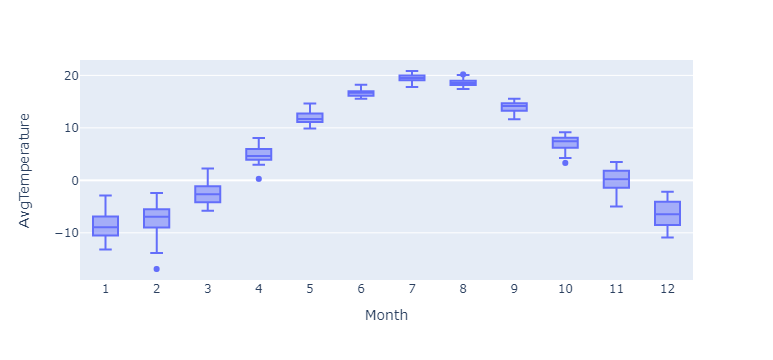

In [32]:
px.box(data_canada, x = "Month", y = "AvgTemperature")

Each of these box plots is related to different months from 1995 to 2019. 

To better distinguish between different months, let's just map the months into colors.

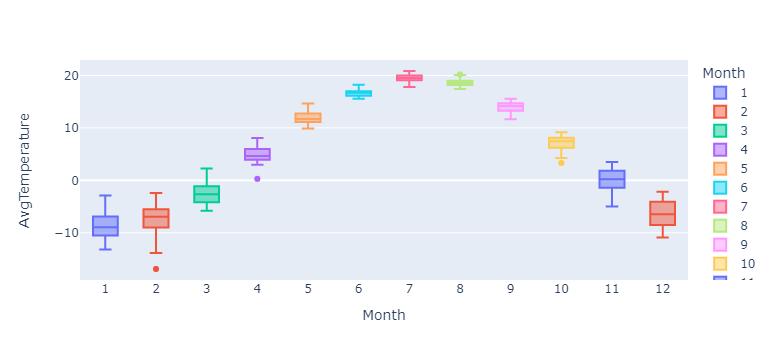

In [33]:
px.box(data_canada, x = "Month", y = "AvgTemperature", color = "Month")

Now each of the months has different colors.

__How to analyze a box plot.__

each of these box says that we can see here, contains five important information about the average temperature in each of the months that we have.
So for example, if we look at this box which is related
to the months January,

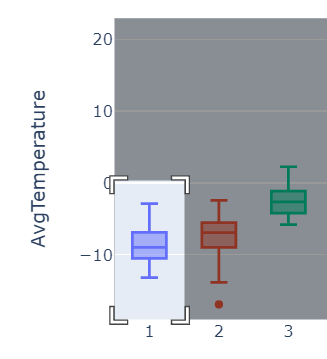

this box plot is constructed by all of the values related
to the month January from 1995 to 2019. So basically it's constructed by an array contains different average temperatures. Each corresponds to average temperature of january
in different years.
So this box plot contains five important information as you
can see here.

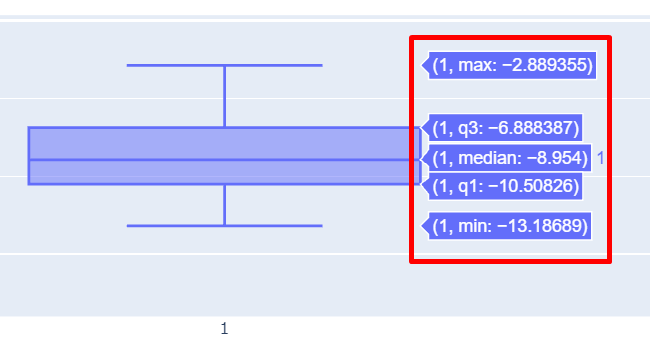

The first one is upper extreme or the maximum average
temperature in january. The second one that we're going to talk about is lower
extreme, which corresponds to the minimum average
temperature in January from 1995 to 2019.
Which is shown by the bottom line in boxplot.
And the line inside the box is showing the median value in the array
of the floats that we have.

And the box specifies the range between lower quartile and upper quartile.
The upper quartile corresponds to the median value
of the values between median and upper extreme or the maximum
value. 
And the lower quartile corresponds to the median value
of the date of the values between the median and the lower
extreme.

So basically by looking at this box, we can say that
according to our data From 1995 to 2019, the maximum average
temperature in January was -2.8 Celsius. And the minimum
value is -13.1 Celsius.
And the box is showing the most likely average temperature
in january based upon our data.

So if you zoom out again by clicking on the reset axes,
by looking at this box plot, we can see all
of this information about different months that we have.

And also it can show more global and general picture
of the whole data.
So if somebody asks us "What is the hottest month of the year
in Canada?", we can easily zoom in to this part of our graph.

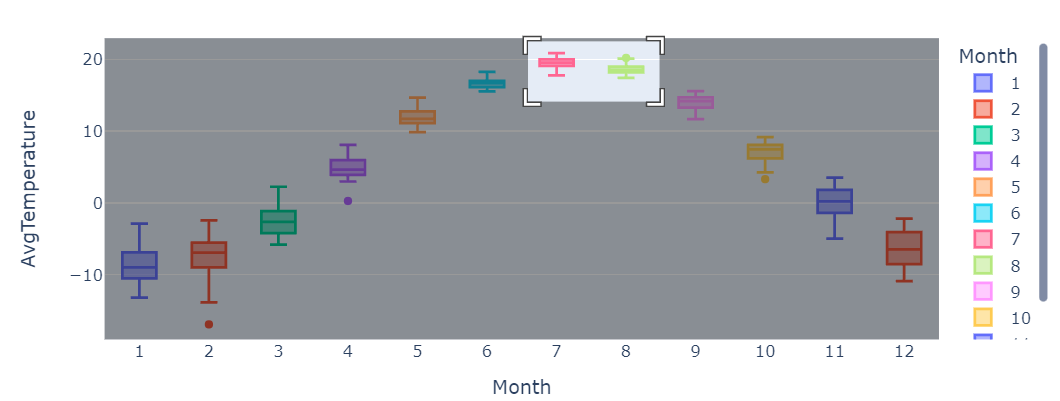

And by comparing these two box plots, 

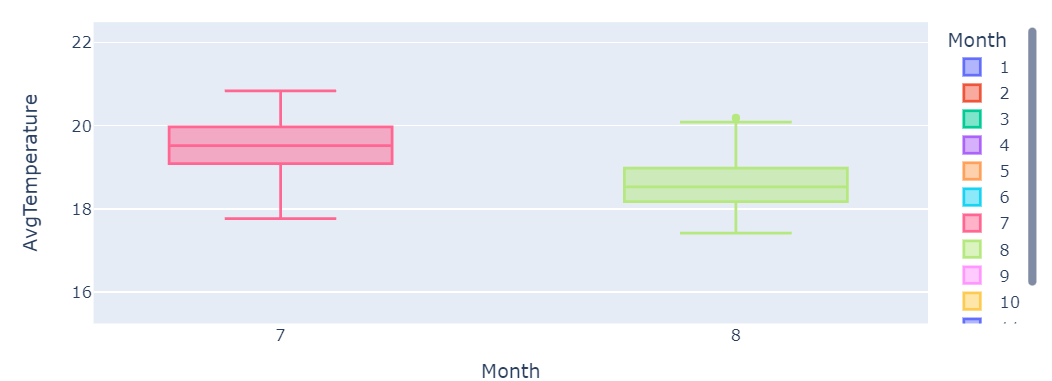

we can say that in July, usually the temperature is between 19.0 and 19.9 degrees. But in
August it's from 18.1 and 18 until 18.9.
So by comparing these two boxes in here 

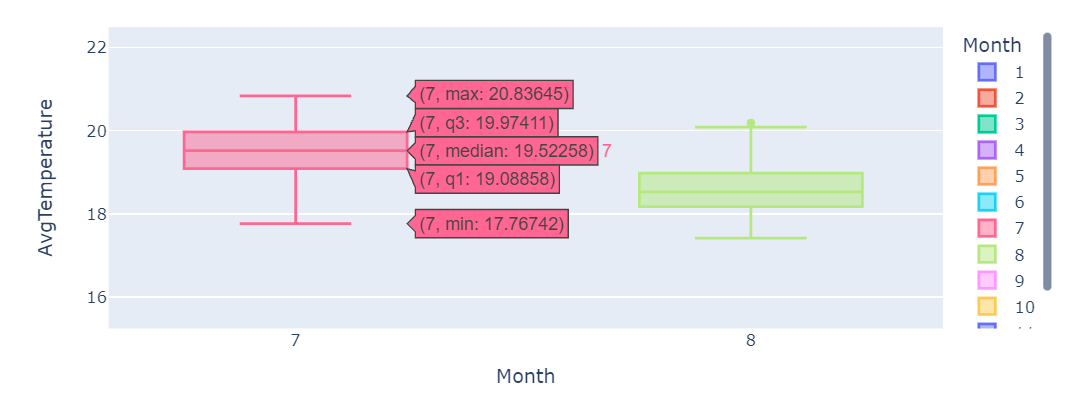

and here, 

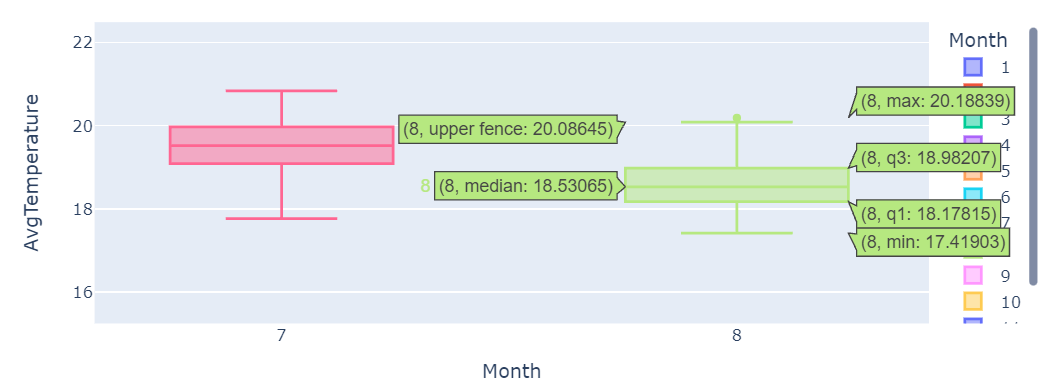

we can say that the hottest months in Canada is July. 

Let's go back to the original graph again by clicking on the reset axes.
Let's talk about the outlier detection.
Outliers in a box plot are shown with dots.

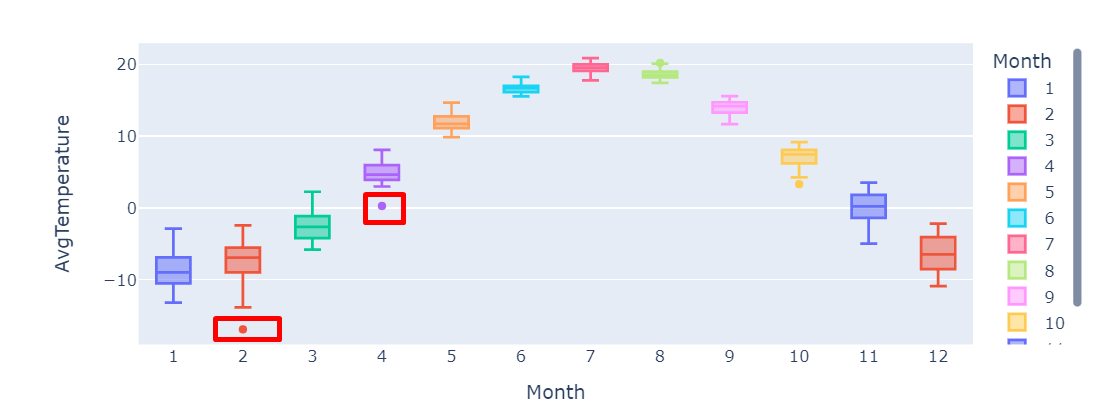

If we remember from the bar chart above where we found an
outlier in april, we can also see this outlier in
this box plot.

So let's zoom in here.

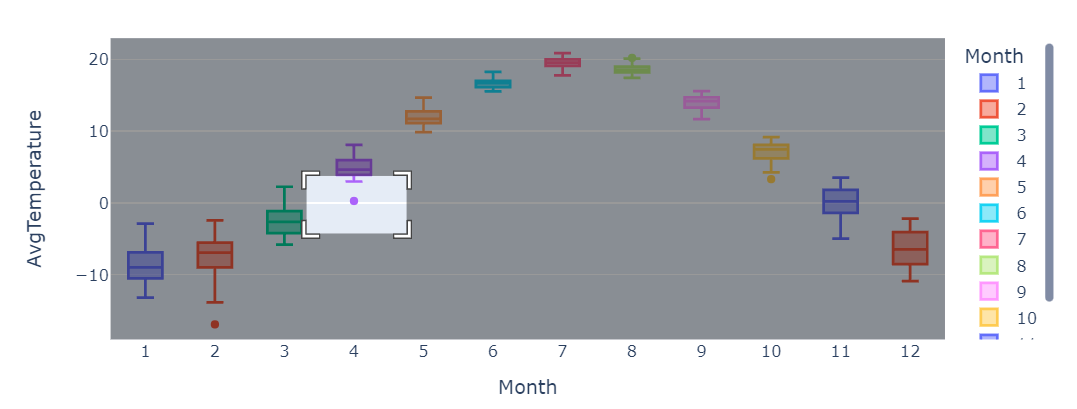

if we hover over this dot, 

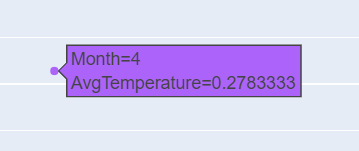

we can say that in month four, the average temperature of 0.27 is the
outlier of this month.

Box plots are very handy tools for analyzing both
outlier detection and finding key moments in our data.

So, in this project we've tackled about different visualization techniques and how we can compare them in terms of different tasks, very important tasks like overall trend analysis, outlier
detection and finding key moments.